# Unsupervised Learning - Clustering

In [1]:
install.packages(c("clustertend"))

Installing package into ‘/home/nestor/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



In [2]:
library("clustertend")
library("factoextra")

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [3]:
data('iris')
head(iris, 3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
# Eiminamos la columna del tipo de especie
df <- iris[, -5]

# Generamos datos aleatorios con base en el conjunto de datos iris
random_df <- apply(df, 2, function(x){runif(length(x), min(x), (max(x)))})
random_df <- as.data.frame(random_df)
head(random_df)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,6.952367,4.175424,6.594826,1.9847175
2,7.120059,3.089175,3.492288,0.8187598
3,7.106656,4.055785,6.677235,1.6826099
4,5.500020,4.306202,6.313601,0.3670511
5,5.863049,2.781909,6.177985,0.1486557
6,6.915253,2.473433,1.742606,1.5986392


In [5]:
# Estandarizamos al conjunto de datos
df <- iris.scaled <- scale(df)
random_df <- scale(random_df)

head(random_df)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1.01382134,1.63525782,1.5216471,1.0574977
1.17598484,-0.00763884,-0.3205842,-0.6974573
1.16302414,1.45430878,1.5705801,0.6027769
-0.39064812,1.83305190,1.3546610,-1.3773521
-0.03958703,-0.47236307,1.2741342,-1.7060725
0.97793095,-0.93891742,-1.3595141,0.4763873


## Inspección visual de los datos

In [6]:
prcomp(df)

Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971

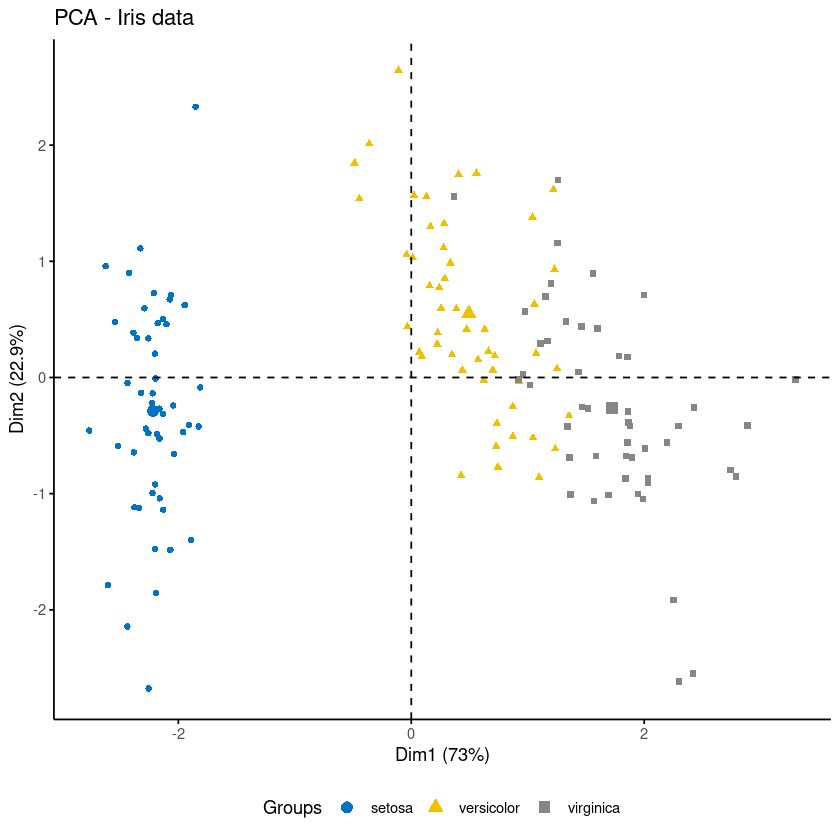

In [7]:
fviz_pca_ind(prcomp(df), title = "PCA - Iris data",
    habillage = iris$Species, palette = "jco", geom = "point", 
    ggtheme = theme_classic(), legend = "bottom"
)

In [8]:
prcomp(random_df)

Standard deviations (1, .., p=4):
[1] 1.0611425 1.0455679 0.9941948 0.8901354

Rotation (n x k) = (4 x 4):
                    PC1        PC2        PC3         PC4
Sepal.Length  0.2269505 -0.2210779 -0.9467809 -0.05678073
Sepal.Width  -0.5124478  0.6037462 -0.2298877 -0.56572024
Petal.Length -0.3232343 -0.7503763  0.1314043 -0.56141599
Petal.Width   0.7625027  0.1534616  0.1830044 -0.60128915

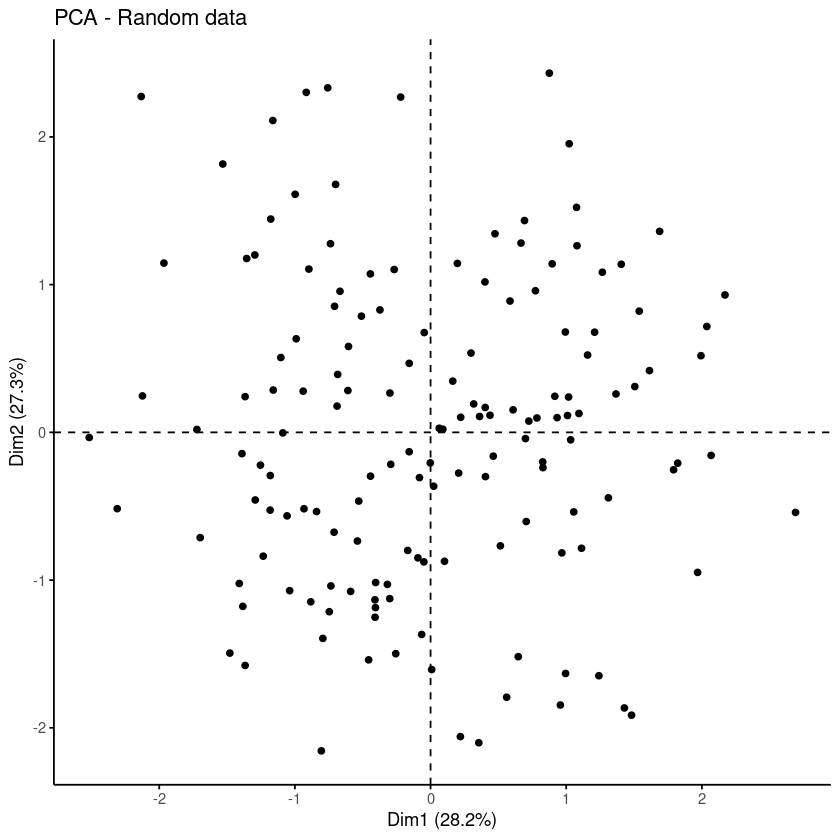

In [9]:
# Plot the random df
fviz_pca_ind(prcomp(random_df), title = "PCA - Random data",
    geom = "point", ggtheme = theme_classic()
)

## Aplicando $k$-means

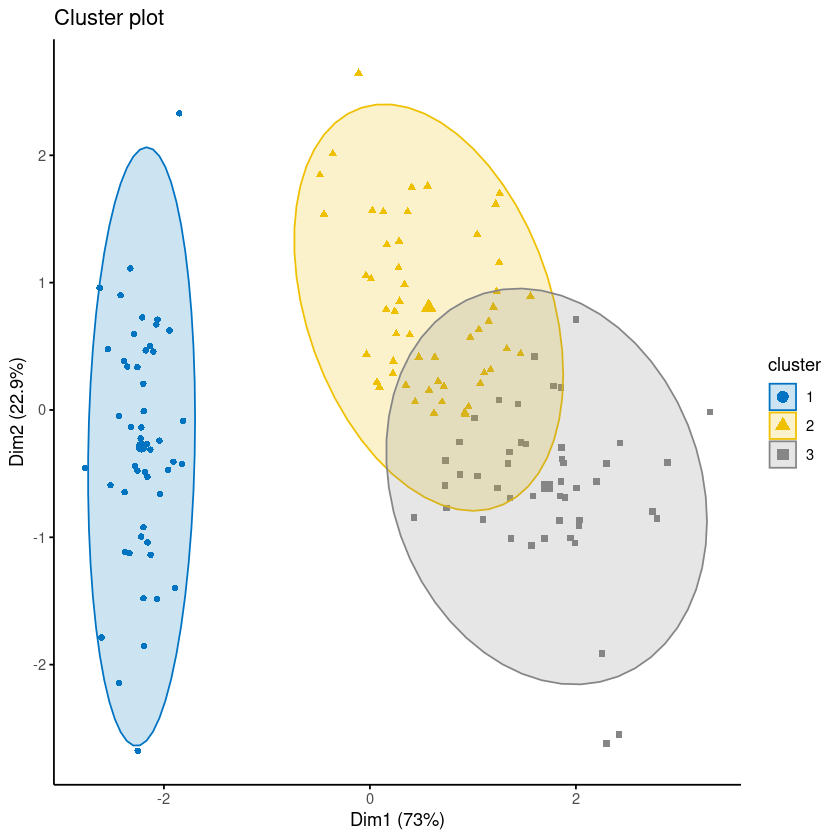

In [10]:
# Comenzamos el agrupamiento con Kmeans
set.seed(123)

# K-means on iris dataset
km.res1 <- kmeans(df, 3)
fviz_cluster(
    list(data = df, cluster = km.res1$cluster),
    ellipse.type = "norm", geom = "point", stand = FALSE, palette = "jco", 
    ggtheme = theme_classic()
)

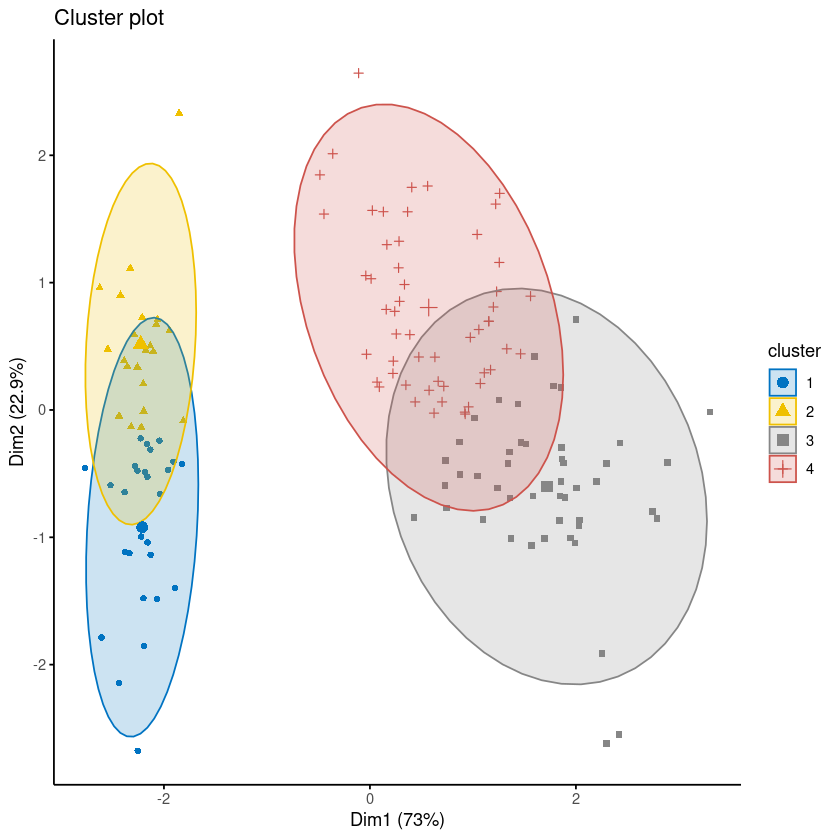

In [11]:
# K-means on iris dataset
km.res1 <- kmeans(df, 4)
fviz_cluster(
    list(data = df, cluster = km.res1$cluster),
    ellipse.type = "norm", geom = "point", stand = FALSE, palette = "jco", 
    ggtheme = theme_classic()
)

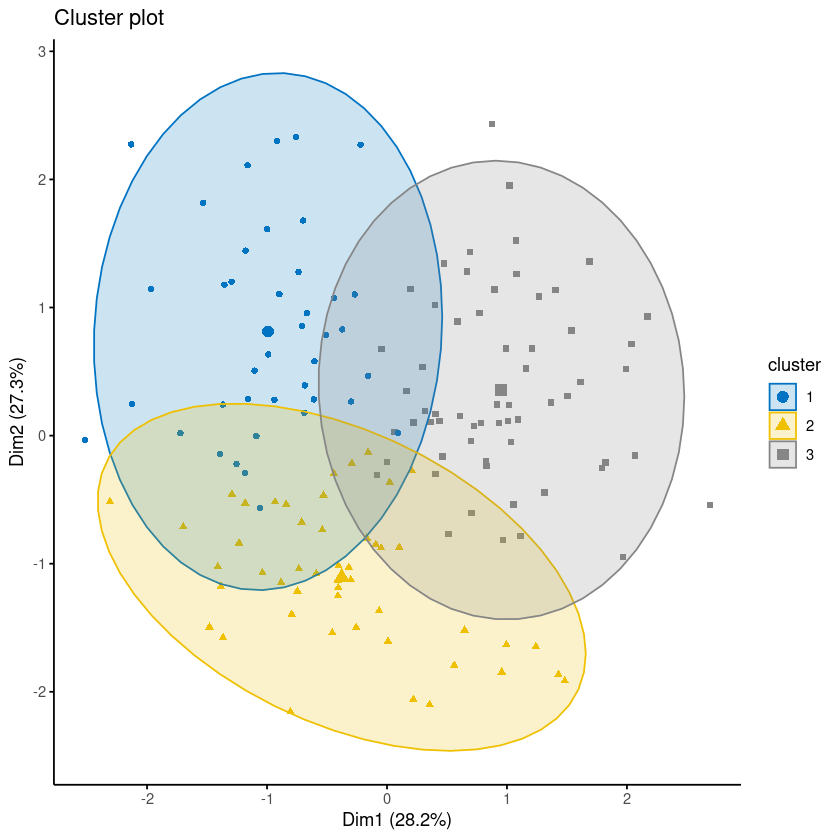

In [12]:
# K-means on the random dataset
km.res2 <- kmeans(random_df, 3)
fviz_cluster(list(data = random_df, cluster = km.res2$cluster),
ellipse.type = "norm", geom = "point", stand = FALSE,
palette = "jco", ggtheme = theme_classic())

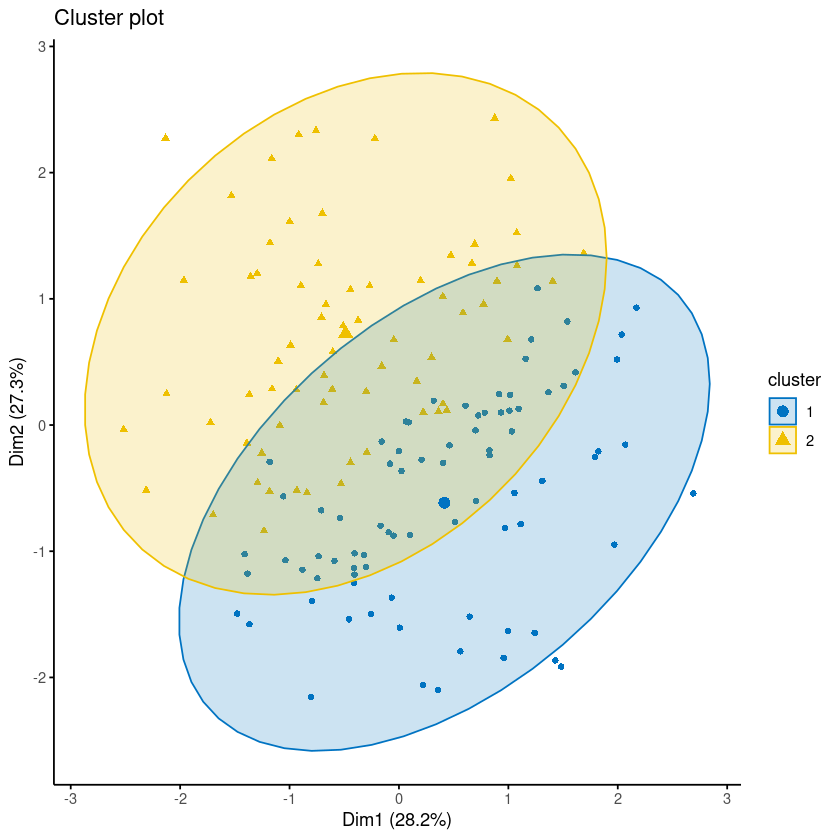

In [13]:
# K-means on the random dataset
km.res2 <- kmeans(random_df, 2)
fviz_cluster(list(data = random_df, cluster = km.res2$cluster),
ellipse.type = "norm", geom = "point", stand = FALSE,
palette = "jco", ggtheme = theme_classic())

## Agrupamiento jerárquico

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


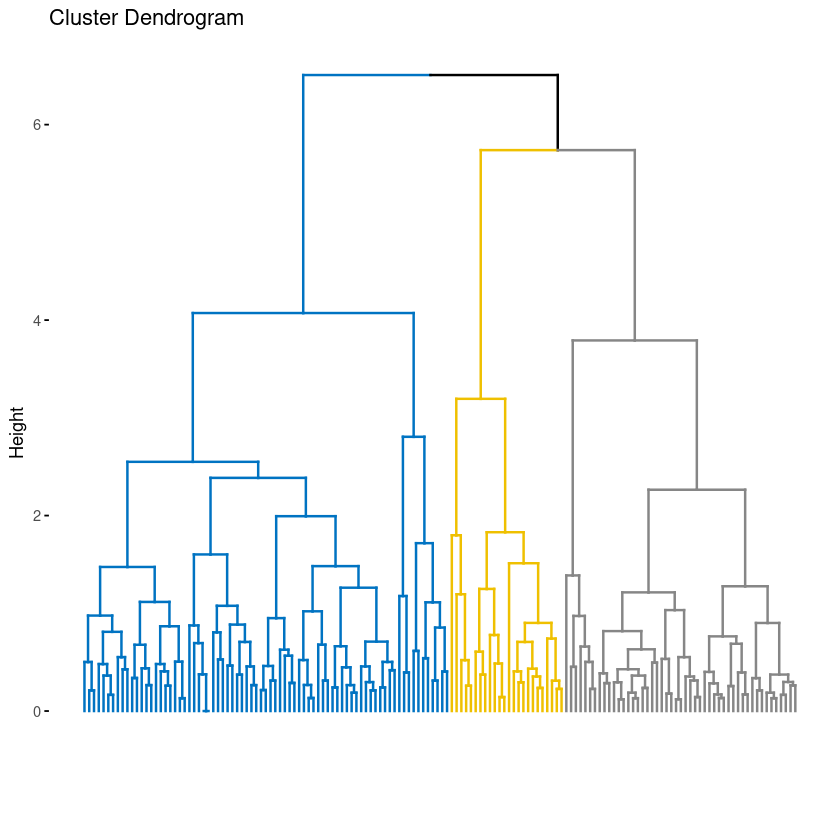

In [14]:
# Hierarchical clustering on the random dataset
fviz_dend(hclust(dist(df)), k = 3, k_colors = "jco",
as.ggplot = TRUE, show_labels = FALSE)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


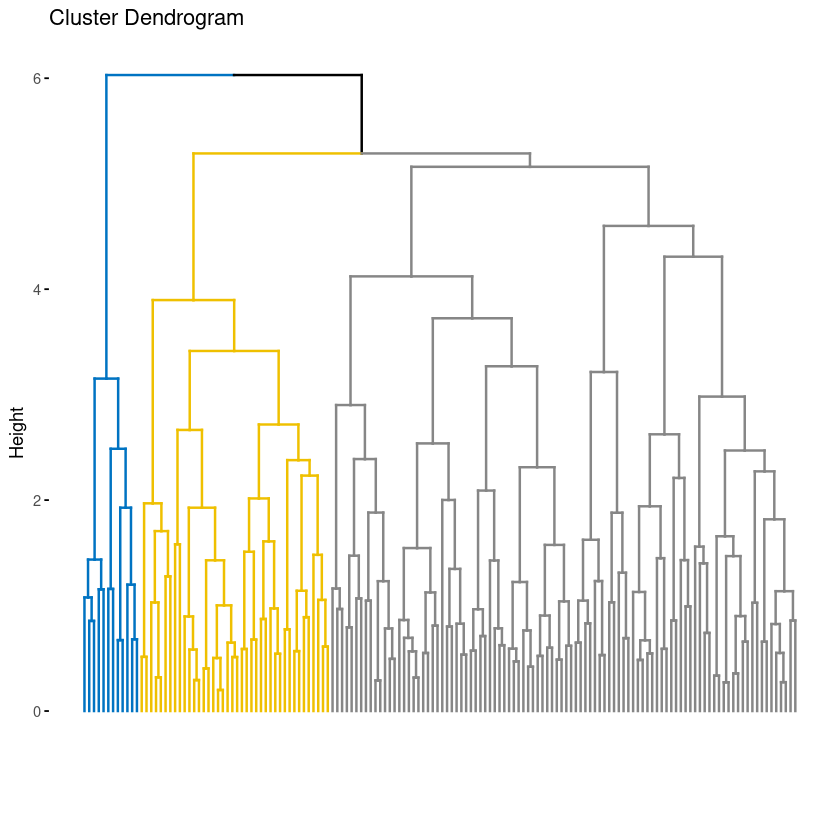

In [15]:
# Hierarchical clustering on the random dataset
fviz_dend(hclust(dist(random_df)), k = 3, k_colors = "jco",
as.ggplot = TRUE, show_labels = FALSE)

## Métodos para analizar tendencia de los clusters

1. Estadístico de Hopkins
2. Visual Assessment of cluster Tendency (VAT)

### Hopkins statistic

Compara las distancias de los datos originales contra los datos simulados y permite dar una medidad estadística sobre si los datos se pueden agrupar en clusters o no

- Si el estadístico $H \approx 0$, se rechaza $H_0$ por lo que existen evidencias para generar agrupaciones
- Si el estadístico $H \approx 0.5$ se para el proceso pues no se podrán generar agrupaciones

In [16]:
set.seed(123)
hopkins(df, n = nrow(df)-1) #quitamos uno por el de clasificación

$H
[1] 0.1815219

Sí vale la pena hacer agrupaciones

In [17]:
set.seed(123)
hopkins(random_df, n = nrow(random_df)-1)

$H
[1] 0.5055914

No vale la pena hacer agrupaciones

### Visual Assessment of cluster Tendency (VAT)

- Visualización tipo mapa de calor
- Se calcula la matriz de disimilitud

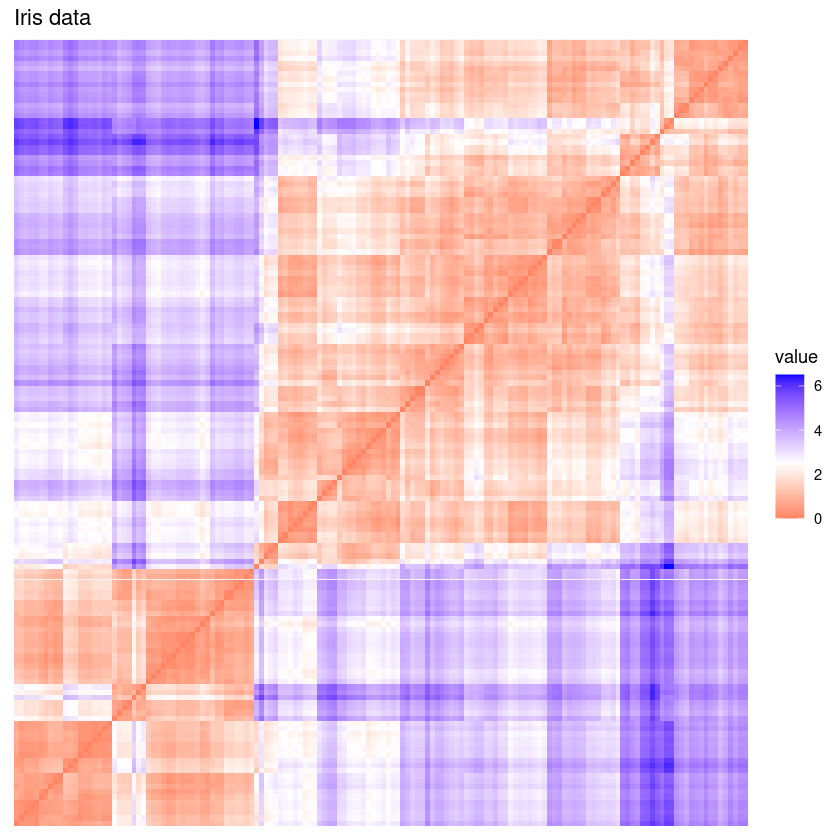

In [18]:
fviz_dist(dist(df), show_labels = FALSE)+
labs(title = "Iris data")
#rojo es alta similitud dist (xi, xj) = 0
#azul, baja similitud  dist (xi, xj) = 1

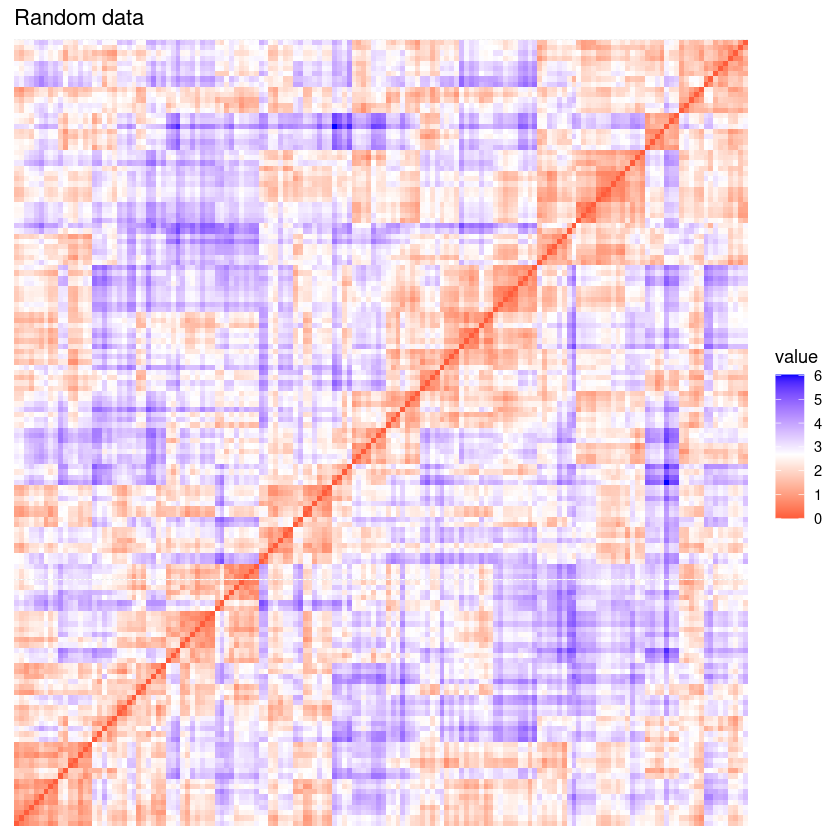

In [19]:
fviz_dist(dist(random_df), show_labels = FALSE)+
labs(title = "Random data")
#rojo es alta similitud dist (xi, xj) = 0
#azul, baja similitud  dist (xi, xj) = 1

## Determinar el número óptimo de clusters

Tres métodos principales:

1. Elbow method
2. Silhouette method
3. Gap Statistic method

In [27]:
library("NbClust")

In [28]:
df <- scale(USArrests)
head(df)

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292
Colorado,0.02571456,0.3988593,0.8608085,1.864967207


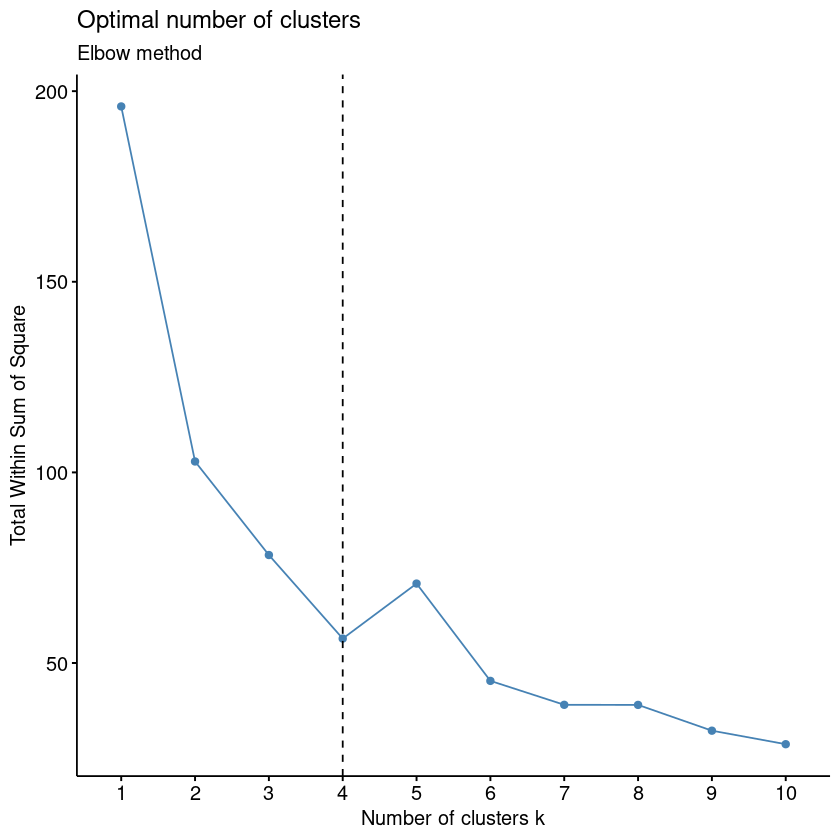

In [29]:
# Elbow method
fviz_nbclust(df, kmeans, method = "wss") +
geom_vline(xintercept = 4, linetype = 2)+
labs(subtitle = "Elbow method")

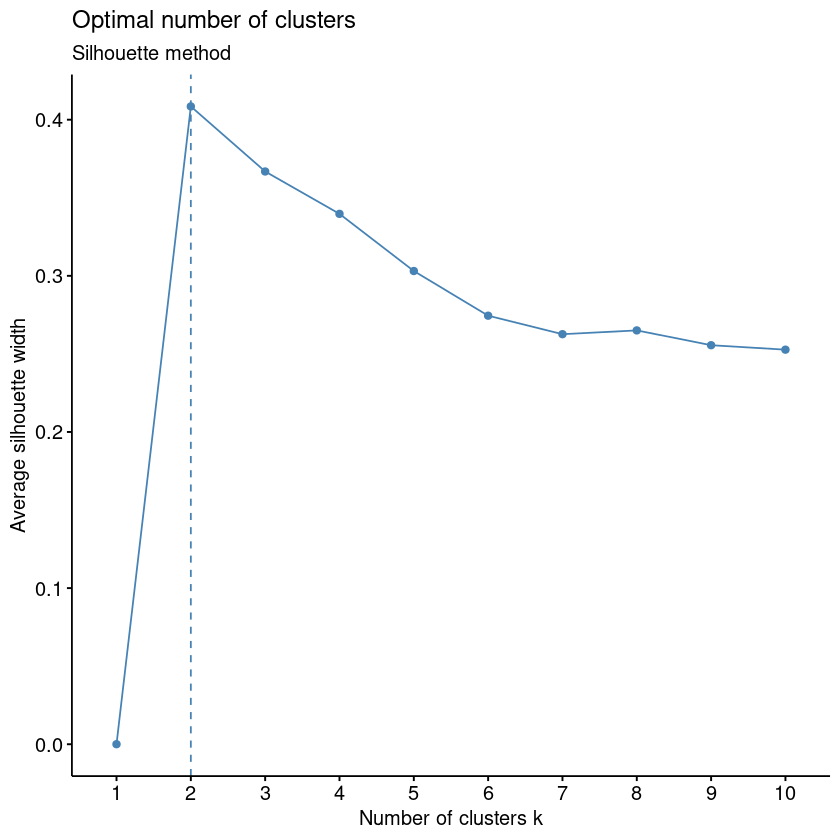

In [30]:
# Silhouette method
fviz_nbclust(df, kmeans, method = "silhouette")+
labs(subtitle = "Silhouette method")

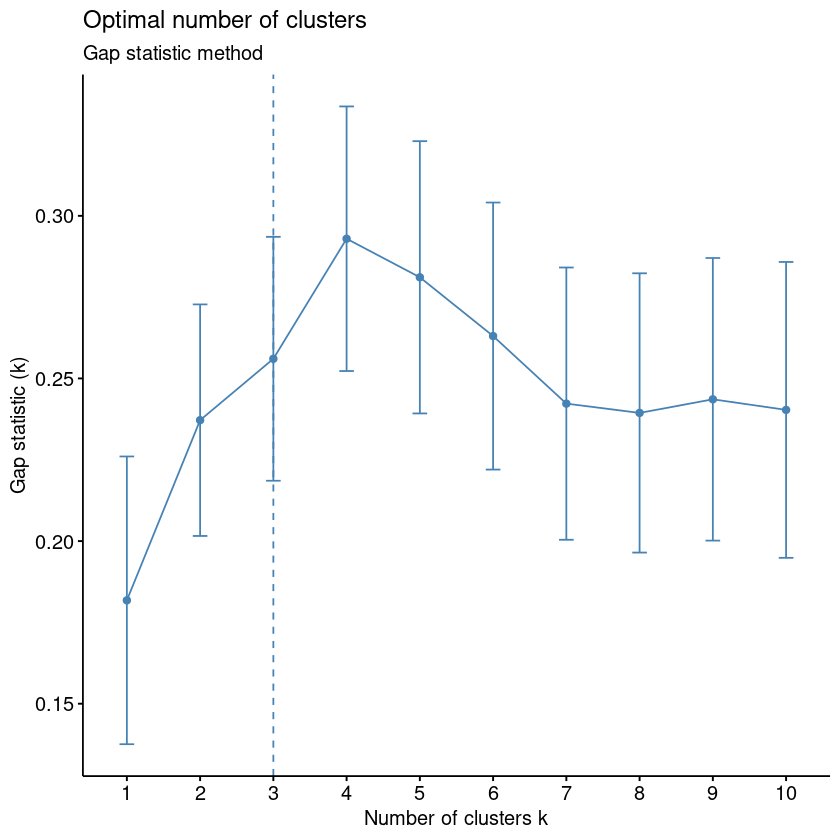

In [32]:
# Gap statistic method
set.seed(123)
fviz_nbclust(df, kmeans, nstart = 25, method = "gap_stat", nboot = 50)+
labs(subtitle = "Gap statistic method")

## Validación de los clusters

1. 